In [1]:
import numpy as np
import matplotlib.pyplot as plt


Диференціальне рівняння

In [2]:
def f(x, y):
    p = 2
    return (p + 4) * y ** ((p + 3) / (p + 4))


Розв'язок диференціального рівняння

In [3]:
def solution(x):
    p = 2
    return x**(p+3)


Метод прогнозу та корекції Адамса другого порядку

In [4]:
def adams_predict_correct(f, a, b, y0, h):
    n = int((b - a) / h)
    x = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    y[0] = y0

    for i in range(0, 2):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h, y[i] + k1)
        y[i+1] = y[i] + 0.5 * (k1 + k2)

    for i in range(2, n):
        y[i+1] = y[i] + h / 2 * (3 * f(x[i], y[i]) - f(x[i-1], y[i-1]))

    return x, y


Графік локальної похибки

In [5]:
def plot_local_error(x, y_numerical, y_analytic):
    y_analytic_interp = np.interp(x, x_analytic, y_analytic)
    error = np.abs(y_numerical - y_analytic_interp)
    plt.plot(x, error, label='Локальна похибка')
    plt.xlabel('x')
    plt.ylabel('Похибка')
    plt.title('Локальна похибка')
    plt.legend()
    plt.show()


Функція для оцінки похибки

In [6]:
def estimate_error(y_corrected, y_predicted):
    return np.abs(y_corrected - y_predicted)


Графік оцінки похибки

In [7]:
def plot_error_estimate(x, error_estimate):
    plt.plot(x, error_estimate, label='Оцінка похибки')
    plt.xlabel('x')
    plt.ylabel('Похибка')
    plt.title('Оцінка похибки')
    plt.legend()
    plt.show()


Вибір кроку h для заданої точності

In [8]:
def automatic_step_selection(f, a, b, y0, accuracy):
    h = 0.1
    x, y = adams_predict_correct(f, a, b, y0, h)
    n = len(y)
    if n % 2 != 0:
        n -= 1

    while True:
        h /= 2
        x_half, y_half = adams_predict_correct(f, a, b, y0, h)
        y_half = y_half[:len(y)]  # Adjust size of y_half
        error = np.max(np.abs(y_half - y))
        if error < accuracy:
            break
        x, y = x_half, y_half
    return h



Побудова графіка залежності величини кроку h(x)

In [9]:
def plot_step_size(x, h_values):
    plt.plot(x, h_values, label='Крок h')
    plt.xlabel('x')
    plt.ylabel('Крок h')
    plt.title('Залежність кроку h від x')
    plt.legend()
    plt.show()


Вхідні дані, обчислення аналітичного розв'язку, задання початкового кроку h, виклик функцій для отримання результатів

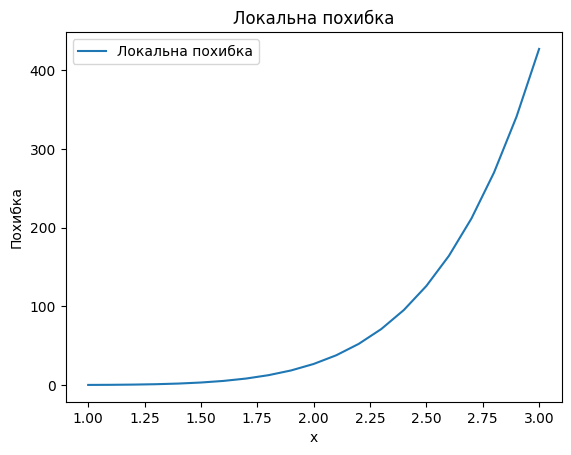

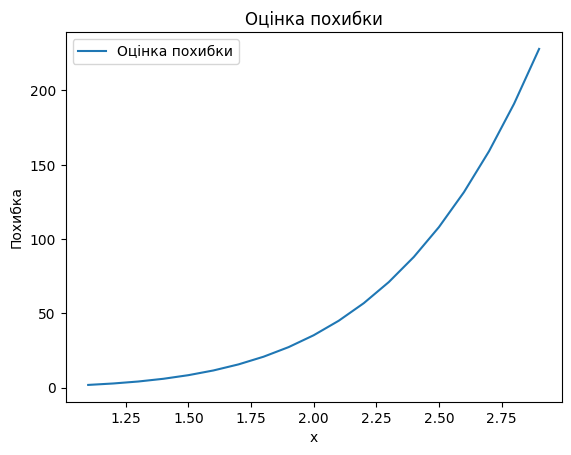

Оптимальний крок h: 6.103515625e-06


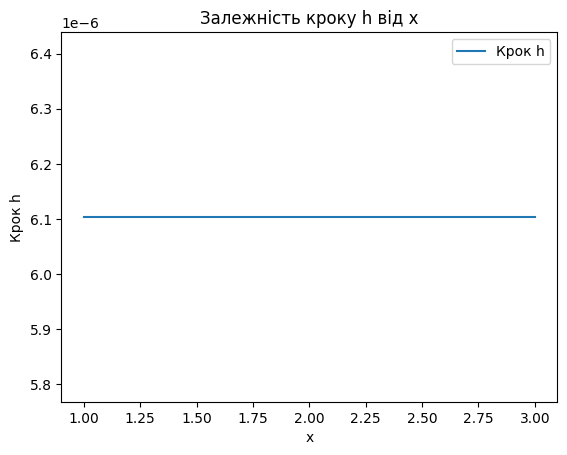

In [10]:
a = 1
b = 3
y0 = 1
accuracy = 0.001

x_analytic = np.linspace(a, b, 100)
y_analytic = solution(x_analytic)

h_initial = 0.1

x_numerical, y_numerical = adams_predict_correct(f, a, b, y0, h_initial)
plot_local_error(x_numerical, y_numerical, y_analytic)

error_estimate = estimate_error(y_numerical[2:], y_numerical[:-2])
plot_error_estimate(x_numerical[1:-1], error_estimate)

optimal_h = automatic_step_selection(f, a, b, y0, accuracy)
print("Оптимальний крок h:", optimal_h)

x_step_size = np.linspace(a, b, 10)
h_values = [optimal_h] * len(x_step_size)
plot_step_size(x_step_size, h_values)
